1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


78

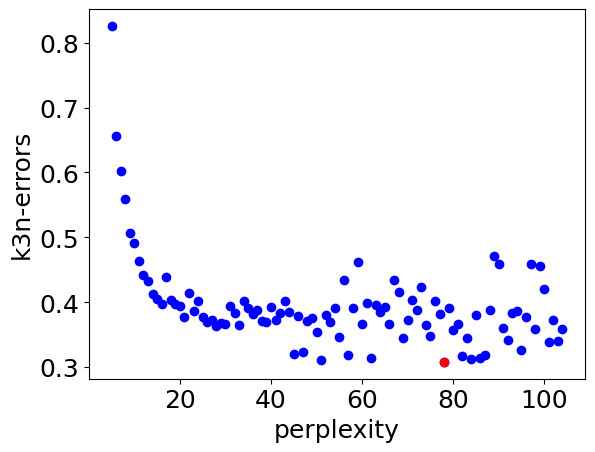

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
autoscaled_x=(x-x.mean())/x.std()
def _replace_zero_with_the_smallest_positive_values(arr):
        arr[arr == 0] = np.min(arr[arr != 0])
def k3n_error(x_1, x_2, k):
    
    x_1 = np.array(x_1)
    x_2 = np.array(x_2)

    x_1_distance = cdist(x_1, x_1)
    x_1_sorted_indexes = np.argsort(x_1_distance, axis=1)
    x_2_distance = cdist(x_2, x_2)

    for i in range(x_2.shape[0]):
        _replace_zero_with_the_smallest_positive_values(x_2_distance[i, :])

    identity_matrix = np.eye(len(x_1_distance), dtype=bool)
    knn_distance_in_x_1 = np.sort(x_2_distance[:, x_1_sorted_indexes[:, 1:k + 1]][identity_matrix])
    knn_distance_in_x_2 = np.sort(x_2_distance)[:, 1:k + 1]

    sum_k3n_error = (
            (knn_distance_in_x_1 - knn_distance_in_x_2) / knn_distance_in_x_2
    ).sum()
    return sum_k3n_error / x_1.shape[0] / k
import numpy as np
from scipy.spatial.distance import cdist
candidates_of_perplexity = np.arange(5, 105, 1, dtype=int)
k3n_errors=[]
for index, perplexity in enumerate(candidates_of_perplexity):
    print(index + 1, '/', len(candidates_of_perplexity))
    t=TSNE(perplexity=perplexity, n_components=2, init='pca', random_state=10).fit_transform(autoscaled_x)
    scaled_t=(t-t.mean(axis=0))/t.std(axis=0, ddof=1)
    k3n_errors.append(k3n_error(autoscaled_x, scaled_t, 10)+k3n_error(scaled_t, autoscaled_x, 10))
optimal_perplexity = candidates_of_perplexity[np.where(k3n_errors == np.min(k3n_errors))[0][0]]
display(optimal_perplexity)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=18
plt.scatter(candidates_of_perplexity, k3n_errors, c='blue')
plt.scatter(optimal_perplexity, k3n_errors[np.argmin(k3n_errors)], c='red')
plt.xlabel("perplexity")
plt.ylabel("k3n-errors")
plt.show()

In [2]:
t=TSNE(perplexity=optimal_perplexity, n_components=2, init='pca', random_state=10).fit_transform(autoscaled_x)
t=pd.DataFrame(t)
t.index=dataset.index
t.columns=['t1', 't2']
t

,t1,t2
sample,,
試料1,-6.476307,1.435436
試料2,6.719894,8.918716
試料3,3.340426,13.042530
試料4,4.247967,7.514071
試料5,-4.391382,-8.546434
...,...,...
試料544,1.060515,-5.111050
試料545,1.142116,-5.046741
試料546,1.141361,-5.075429


In [3]:
t1_max=t.iloc[:, 0].max()
t2_max=t.iloc[:, 1].max()
print(t1_max, t2_max)

13.12142562866211 16.624513626098633


In [4]:
t1_min=t.iloc[:, 0].min()
t2_min=t.iloc[:, 1].min()
print(t1_min, t2_min)

-12.542291641235352 -10.637871742248535


In [5]:
from dcekit.validation import k3nerror
k3nerror_of_pca = k3nerror(autoscaled_x, t, 3) + k3nerror(t, autoscaled_x, 3)
k3nerror_of_pca

0.42506945396634715

# mor

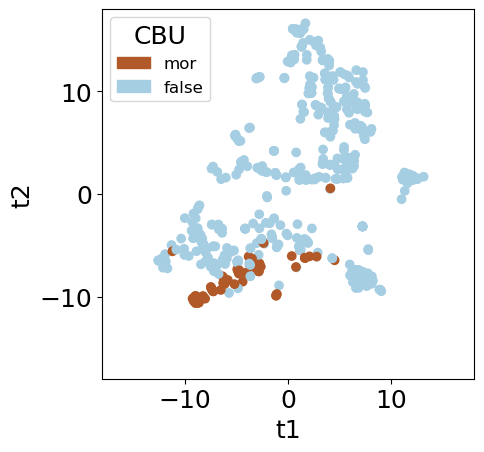

In [6]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_mor=dataset.iloc[:, 9]
CBU_mor=pd.factorize(y_mor)[0]


plt.figure(figsize=figure.figaspect(1))
plt.rcParams['font.size']-10
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=CBU_mor, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 9].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.show()

# jbw

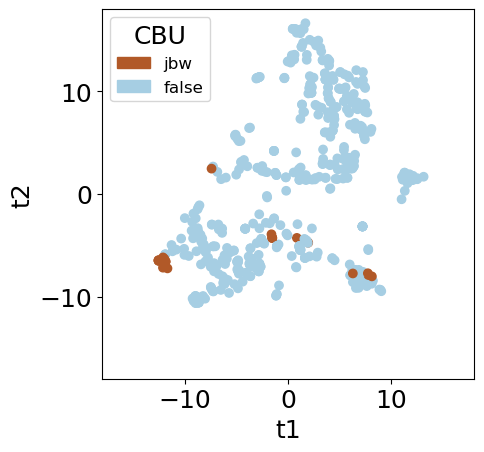

In [7]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_jbw=dataset.iloc[:, 10]
CBU_jbw=pd.factorize(y_jbw)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=CBU_jbw, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 10].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.show()

# d6r

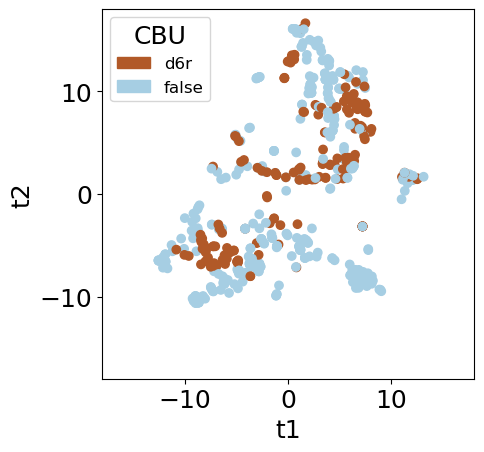

In [8]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_d6r=dataset.iloc[:, 11]
CBU_d6r=pd.factorize(y_d6r)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=CBU_d6r, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 11].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.show()

# d8r

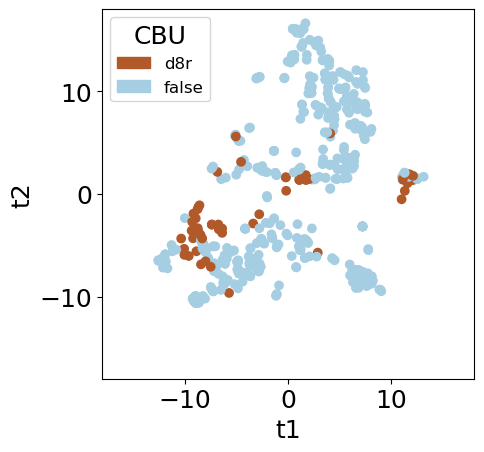

In [9]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_d8r=dataset.iloc[:, 12]
CBU_d8r=pd.factorize(y_d8r)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=CBU_d8r, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 12].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.show()

# can

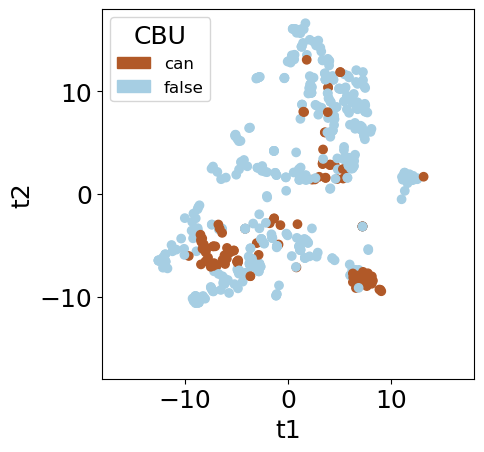

In [10]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_can=dataset.iloc[:, 13]
CBU_can=pd.factorize(y_can)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=CBU_can, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 13].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.show()

# sod

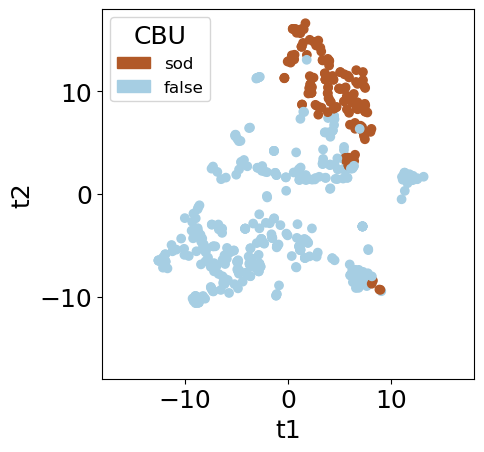

In [11]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_sod=dataset.iloc[:, 14]
CBU_sod=pd.factorize(y_sod)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=CBU_sod, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 14].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.show()

# lta

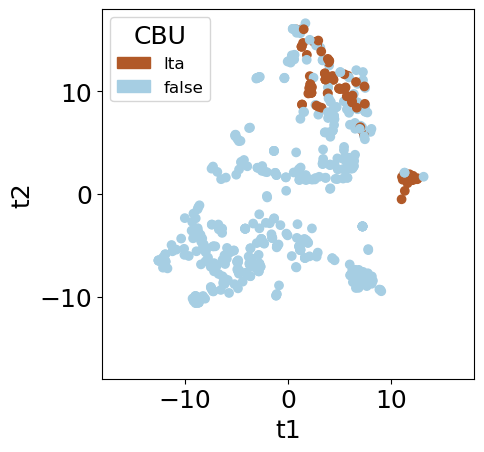

In [12]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_lta=dataset.iloc[:, 15]
CBU_lta=pd.factorize(y_lta)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=CBU_lta, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 15].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.show()

# 4

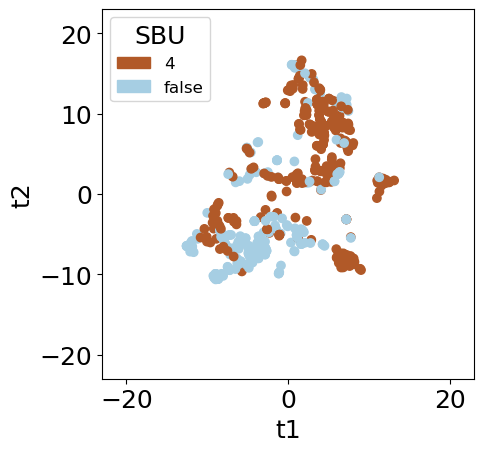

In [15]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_4=dataset.iloc[:, 16]
SBU_4=pd.factorize(y_4)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=SBU_4, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 16].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-23, 23)
plt.ylim(-23, 23)
plt.show()

# 6

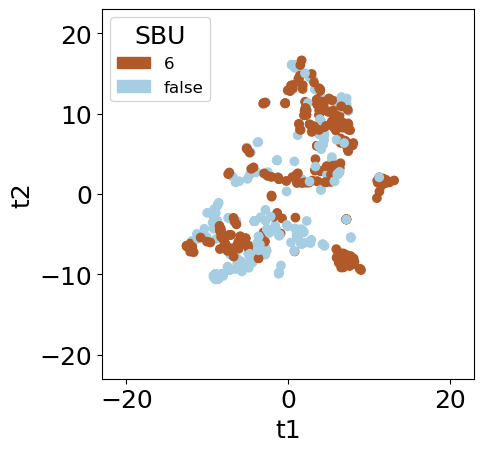

In [16]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_6=dataset.iloc[:, 17]
SBU_6=pd.factorize(y_6)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=SBU_6, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 17].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-23, 23)
plt.ylim(-23, 23)
plt.show()

# 8

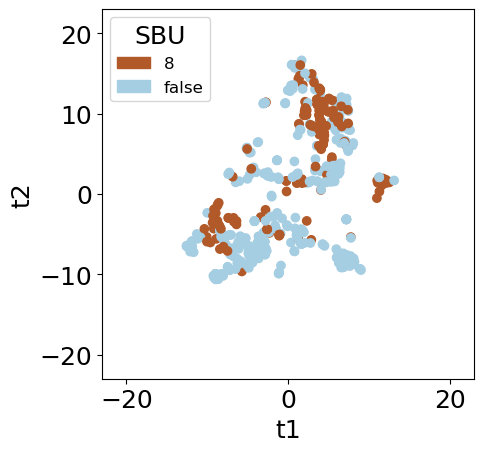

In [17]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_8=dataset.iloc[:, 18]
SBU_8=pd.factorize(y_8)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=SBU_8, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 18].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-23, 23)
plt.ylim(-23, 23)
plt.show()

# 5-1

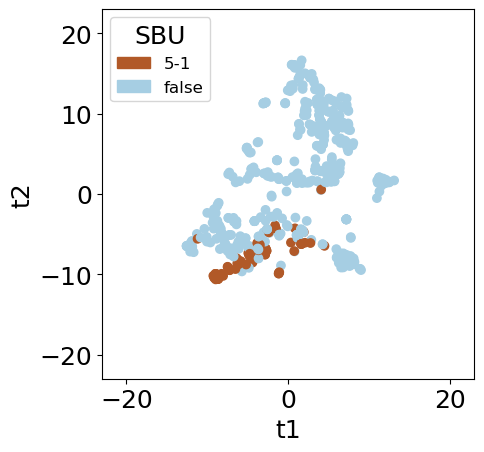

In [18]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_5_1=dataset.iloc[:, 19]
SBU_5_1=pd.factorize(y_5_1)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=SBU_5_1, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 19].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-23, 23)
plt.ylim(-23, 23)
plt.show()

# 4-2

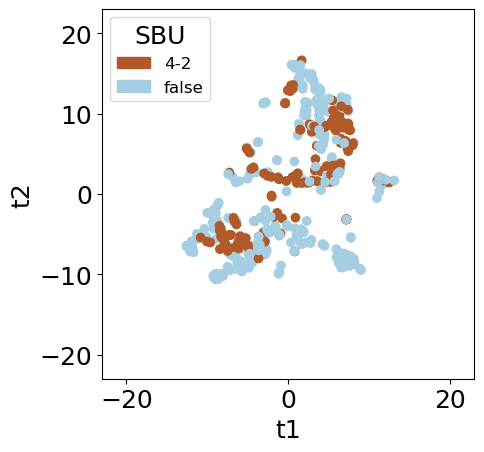

In [19]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_4_2=dataset.iloc[:, 20]
SBU_4_2=pd.factorize(y_4_2)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=SBU_4_2, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 20].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-23, 23)
plt.ylim(-23, 23)
plt.show()

# 6-2

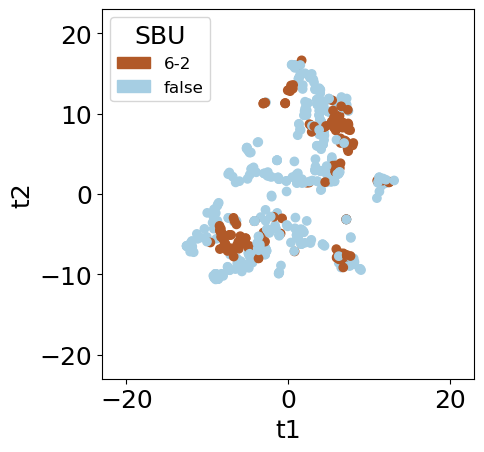

In [20]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_6_2=dataset.iloc[:, 21]
SBU_6_2=pd.factorize(y_6_2)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=SBU_6_2, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 21].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-23, 23)
plt.ylim(-23, 23)
plt.show()

# Amorphous

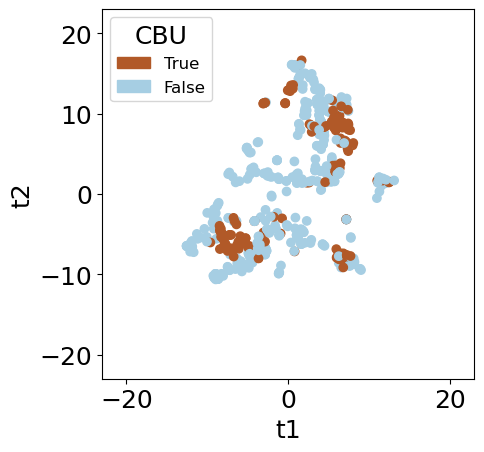

In [21]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

Amorphous=dataset.iloc[:, 21]
Amorphous_factorize=pd.factorize(Amorphous)[0]


plt.figure(figsize=figure.figaspect(1))
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c=Amorphous_factorize, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 22].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU", fontsize=12, loc='upper left')
plt.xlabel('t1')
plt.ylabel('t2')
plt.xlim(-23, 23)
plt.ylim(-23, 23)
plt.show()